
# PARLA

## Problem
The provided dataset contains a portion of the 'Refactoring backend' experiment data:
- 500 values from both the experimental and control groups.
- column 'a' contains 'load time' for control group of users.
- column 'b' contains 'load time' for experimental group of users.

Test the hypothesis of equality of the 99th percentiles, using bootstrap:
- construct a 90% confidence interval for the difference between the 99th percentiles of the control and experimental groups.
- assess the significance of the difference.
- try to use as many bootstrap samples as possible.
- remember that a small number of bootstrap samples can lead to unstable results.

## Action
To test the hypothesis of equality of the 99th percentiles, I:
- calculated 10^5 bootstrapped 99th-percentile deltas:
    - sampled control and experimental groups with repetitions (since bootstrap requires sampling with repetition)
    - calculated 99th-percentile for control-group and experimental-group
    - calculated bootstrap-delta using these percentiles
- plotted histogram of bootstrapped deltas
- calculated 90% confidence interval for deltas
- calculated 90% confidence interval for deltas (using normal approximation)

## Result
- **90% confidence interval for deltas** are successfully calculated:
    - lower bound = 0.0008
    - upper bound = 0.008
- **90% confidence interval for deltas (using normal approximation)** are calculated:
    - although none of the normality tests showed that the distribution of deltas is normal, I still calculated confidence interval for reference:
        - lower bound = 0.00071
        - upper bound = 0.00787
    - this normal-confidence-interval turned out to be very close to bootstrap-confidence-interval
- Hypothesis of equality of the 99th percentiles, using bootstrap:
    - Since the confidence interval doesn't contain zero, we reject the hypothesis of equality
    - Moreover, we can say that since the whole confidence interval is greater than zero, metric 'a' is greater than metric 'b'

## Learning
- I revised relevant Python and Pandas functionality
- I learned how to use bootstrapping for assessing statistical hypothesis with a specified confidence level
- I learned how to calculate confidence interval based on bootstrap distribution of a metric
- I learned how to calculate confidence interval for normally-distributed metric

## Application
- I can apply relevant Python and Pandas functionality for similar data-related problems
- I can apply bootstrapping for assessing statistical hypothesis and calculating confidence intervals using real-world data
- I can calculate confidence intervals for normally distributed metrics using real-world data


In [19]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from helpers.stat_tests import *


In [20]:

df_load_time = pd.read_csv('data/chapter_05_load_time_bootstrap.csv')
df_load_time.head()


,a,b
0,0.0616,0.0754
1,0.0746,0.0833
2,0.0592,0.0783
3,0.0711,0.0855
4,0.0713,0.0786


In [21]:

# bootstrapped 99th-percentile deltas
boot_deltas = []

# calculate bootstrap delta
for i in range(10**5):
    # sample control and experimental groups with repetitions,
    # since bootstrap requires sampling with repetition
    a = df_load_time.a.sample(frac=1, replace=True)
    b = df_load_time.b.sample(frac=1, replace=True)

    # calculate 99th-percentile for control-sample and experimental-sample
    a_percentile = np.percentile(a, 99)
    b_percentile = np.percentile(b, 99)

    # calculate bootstrap-delta using samples
    boot_deltas.append(a_percentile - b_percentile)

boot_deltas = np.array(boot_deltas)


              deltas
count  100000.000000
mean        0.004298
std         0.002168
min        -0.003384
25%         0.003005
50%         0.004098
75%         0.005410
max         0.013787

90% confidence interval, lower bound = 0.0008
90% confidence interval, upper bound = 0.008

NORMALITY TESTING: bootstrap deltas
SHAPIRO-WILK TEST
p-value: 9.351477511913206e-57
sample does not look Gaussian (reject H0)
D’AGOSTINO AND PEARSON’S TEST
p-value: 4.753983955451578e-172
sample does not look Gaussian (reject H0)
KOLMOGOROV-SMIRNOV
p-value: 0.0
sample does not look Gaussian (reject H0)

90% confidence interval, lower bound (normal approximation): 0.00073
90% confidence interval, upper bound (normal approximation): 0.00786


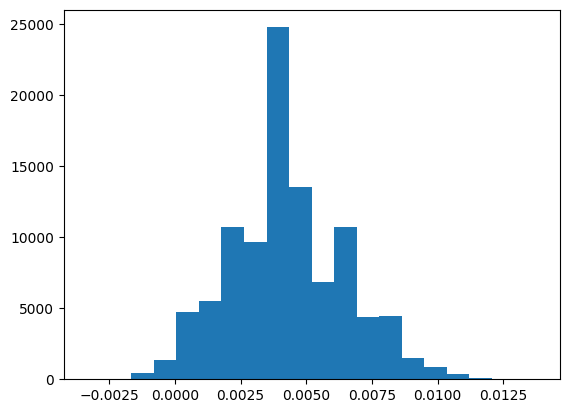

In [22]:

# plot bootstrapped deltas
plt.hist(boot_deltas, bins=20)

# describe deltas
df_bootstrap_deltas = pd.DataFrame(boot_deltas)
df_bootstrap_deltas.columns = ['deltas']
print(df_bootstrap_deltas.describe())

# calculate 90% confidence interval
confidence_level = 90
lower_percentage = (100 - confidence_level) / 2  # 5%
upper_percentage = 100 - lower_percentage  # 95%
lower_bound = np.round(np.percentile(boot_deltas, lower_percentage), decimals=5)
upper_bound = np.round(np.percentile(boot_deltas, upper_percentage), decimals=5)
print(f'\n{confidence_level}% confidence interval, lower bound = {lower_bound}')
print(f'{confidence_level}% confidence interval, upper bound = {upper_bound}\n')

# calculate 90% confidence interval, using normal approximation
normality_test(sample=boot_deltas, name='bootstrap deltas', alpha=0.05)
lower_bound = np.round(boot_deltas.mean() - 1.645 * boot_deltas.std(), decimals=5)
upper_bound = np.round(boot_deltas.mean() + 1.645 * boot_deltas.std(), decimals=5)
print(f'90% confidence interval, lower bound (normal approximation): {lower_bound}')
print(f'90% confidence interval, upper bound (normal approximation): {upper_bound}')
